## Exercise 3

Starting from the following framework of a Tree:

Extend the above into a binary search tree.  In particular, provide an add method that inserts a single numeric value at a time according to the rules for a binary search tree (10 points).

When this is done, you should be able to construct the tree from slides 3 via:

Add the following __contains__ method. This method will allow you to use the in operator; e.g. after this change, 55 in my_tree should be True in the above example, whereas 42 in my_tree would be False. Test this. (5 points). 

__contains__ is an example of what's known as a magic method; such methods allow new data structures you might create to work like built-in data types. For more on magic methods, search the web, or start with this page.

Using various sizes n of trees (populated with random data) and sufficiently many calls to in (each individual call should be very fast, so you may have to run many repeated tests), demonstrate that in is executing in O(log n) times; on a log-log plot, for sufficiently large n, the graph of time required for checking if a number is in the tree as a function of n should be almost horizontal. (5 points).

This speed is not free. Provide supporting evidence that the time to setup the tree is O(n log n) by timing it for various sized ns and showing that the runtime lies between a curve that is O(n) and one that is O(n**2). (5 points)

## Response

In [101]:
##importing libraries 

from tqdm import tqdm #to visualize small progress bar for the process completion 
import random
import time
import statistics
import matplotlib.pyplot as plt

### Extending the Binary Tree

 - Self is used to access all the instances defined within a class, including its methods and attributes.
 - The insert method compares the value of the node to the parent node and decides whether to add it as a left node or right node.If the node is greater than the parent node, it is inserted as a right node; otherwise,it’s inserted left.
 - PrintTree class is used to print the tree.
 - Contains allows to use the in operator.


In [102]:
class Tree:
    def __init__(self, _value = None):
        self._value = _value
        self.left = None
        self.right = None
        
# Recursive function to insert a key into a Binary Search Tree

    def add(self, _value):
        if (self._value == None):
            self._value = _value
        else:
            if self._value == _value:
                self._value = _value
## if the given key is more than the root node,recur for the right subtree
            elif self._value < _value:
                if (self.right == None):
                    self.right = Tree(_value)
                else:
                    self.right.add(_value)
## otherwise, recur for the left subtree
            else:
                if (self.left == None):
                    self.left = Tree(_value)
                else:
                    self.left.add(_value)
                    

# Print the tree

    def PrintTree(self): 
        if self.left:
            self.left.PrintTree()
        print(self._value),
        if self.right:
            self.right.PrintTree()
            
    def __contains__(self, item): 
        if self._value == item:
            return True
        elif self.left and item < self._value:
            return item in self.left
        elif self.right and item > self._value:
            return item in self.right
        else:
            return False

In [103]:
my_tree = Tree()
for item in [55, 62, 37, 49, 71, 14, 17]:
    my_tree.add(item)

In [104]:
my_tree.PrintTree()

14
17
37
49
55
62
71


### Testing whether the given number is in the tree or not.

In [105]:
print(f'my_tree.contains(55) = 'f'{55 in my_tree}')
print(f'my_tree.contains(42) = 'f'{42 in my_tree}')

my_tree.contains(55) = True
my_tree.contains(42) = False


### Graph of time required for checking if a number is in the tree as a function of n

In [106]:
def tree_time(n):
    duration = []
    data_random = [] #contain random n values to be added to the tree
    random_in_data = []
   
    for i in range(n):
        num = random.randint(1,1000)
        data_random.append(num)

    for i in range(1000):
        num = random.randint(1,1000)
        random_in_data.append(num)
        
    count = 0
  
    while(count <= 10):
        my_tree = Tree()
        for num in data_random:
            my_tree.add(num)
        start = time.perf_counter()
        for num in random_in_data:
            num in my_tree
        end = time.perf_counter()
        duration.append(end - start)
        count = count + 1
    return statistics.median(duration)

#### Finding the run time of the tree

In [107]:
numbers = range(1, 1000) #continuous number in the range 1 to 1000
time_run = [tree_time(int(n)) for n in tqdm(numbers)]
starting_pt = time_run[0]
x = []
x2 = []
for n in tqdm(numbers):
    x.append(starting_pt * (n))
for n in tqdm(numbers):
    x2.append(starting_pt * (n**2))

100%|████████████████████████████████████| 999/999 [00:00<00:00, 1575821.62it/s]


#### Visualizing the time required for checking if a number is in the tree as a function of n

<function matplotlib.pyplot.show(close=None, block=None)>

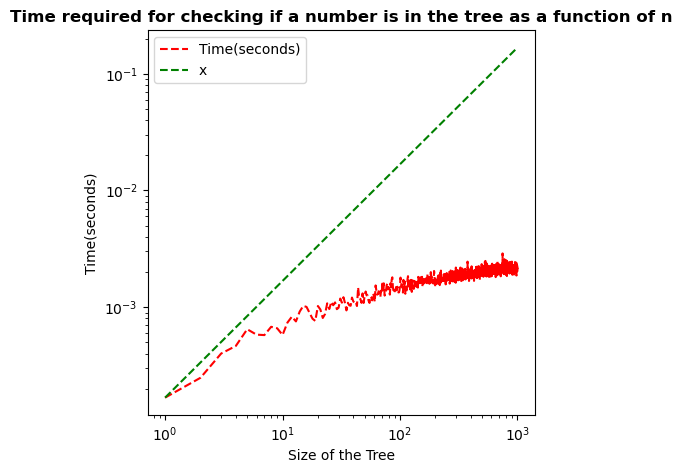

In [108]:
numbers = list(numbers)
fig = plt.figure(figsize =(5,5))
plt.loglog(numbers, time_run, 'r--', numbers, x,"g--")
plt.xlabel("Size of the Tree")
plt.ylabel("Time(seconds)")
plt.title("Time required for checking if a number is in the tree as a function of n", fontweight="bold")
plt.legend(["Time(seconds)", "x"])
plt.show

#### Time to setup the tree 

In [109]:
def tree_setup_time(n):
    duration1 = []
    random_num = []
    for i in range(n):
        num = random.randint(1,1000)
        random_num.append(num)

    count = 0
    while(count <= 100):
        start = time.perf_counter()
        my_tree = Tree(random_num[0])
        for num in random_num[1:]:
            my_tree.add(num)
        end = time.perf_counter()
        duration1.append(end - start)
        count = count + 1
    return statistics.median(duration1)

In [110]:
ns = range(1, 1000)
setup_run_time = [tree_setup_time(int(n)) for n in tqdm(ns)]
start_pt = setup_run_time[0]
x = []
x2 = []
for n in tqdm(ns):
    x.append(start_pt * (n))
for n in tqdm(ns):
    x2.append(start_pt * (n**2))

100%|████████████████████████████████████| 999/999 [00:00<00:00, 1722198.81it/s]


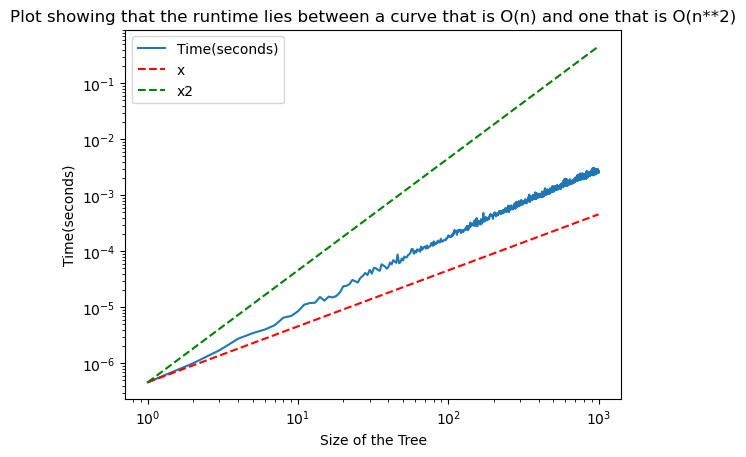

In [111]:
##Plotting the curve graph 

ns = list(ns)
plt.plot(ns, setup_run_time)
plt.loglog(ns, x , "r--", ns, x2, "g--")
plt.xlabel("Size of the Tree")
plt.ylabel("Time(seconds)")
plt.legend(["Time(seconds)","x","x2"])
plt.title("Plot showing that the runtime lies between a curve that is O(n) and one that is O(n**2)")
plt.show()